In [1]:
# data analysis and wrangling 
import pandas as pd
import numpy as np

# visualization
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
%matplotlib inline

# ML models
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier


### Get data from file 

In [2]:
# Read usres.dat,movies.dat,and ratings.dat dataset into pandas DataFrame

u_df=pd.read_csv('./movielens/users.dat',sep='::',names=['UserID','Sex','Age','Occupation','zip-code'], engine='python',header=None)

m_df=pd.read_csv('./movielens/movies.dat', sep= '::', names=['MovieID','Title','Genres'], engine='python', header=None)

r_df=pd.read_csv('./movielens/ratings.dat', sep= '::', names=['UserID','MovieID','Rating', 'Timestamp'], engine='python', header=None)

In [3]:
# Merge movies and ratings datasets into m_r_df on MovieID
m_r_df=pd.merge(m_df,r_df, on='MovieID')
m_r_df.head()

,MovieID,Title,Genres,UserID,Rating,Timestamp
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268
1,1,Toy Story (1995),Animation|Children's|Comedy,6,4,978237008
2,1,Toy Story (1995),Animation|Children's|Comedy,8,4,978233496
3,1,Toy Story (1995),Animation|Children's|Comedy,9,5,978225952
4,1,Toy Story (1995),Animation|Children's|Comedy,10,5,978226474


### Final Master_data

In [4]:
# Merge m_r_df and users  into u_m_r_df on MovieID
u_m_r_df=pd.merge(m_r_df,u_df, on='UserID')
u_m_r_df.head()

,MovieID,Title,Genres,UserID,Rating,Timestamp,Sex,Age,Occupation,zip-code
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268,F,1,10,48067
1,48,Pocahontas (1995),Animation|Children's|Musical|Romance,1,5,978824351,F,1,10,48067
2,150,Apollo 13 (1995),Drama,1,5,978301777,F,1,10,48067
3,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,1,4,978300760,F,1,10,48067
4,527,Schindler's List (1993),Drama|War,1,5,978824195,F,1,10,48067


In [5]:
u_m_r_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000209 entries, 0 to 1000208
Data columns (total 10 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   MovieID     1000209 non-null  int64 
 1   Title       1000209 non-null  object
 2   Genres      1000209 non-null  object
 3   UserID      1000209 non-null  int64 
 4   Rating      1000209 non-null  int64 
 5   Timestamp   1000209 non-null  int64 
 6   Sex         1000209 non-null  object
 7   Age         1000209 non-null  int64 
 8   Occupation  1000209 non-null  int64 
 9   zip-code    1000209 non-null  object
dtypes: int64(6), object(4)
memory usage: 83.9+ MB


In [6]:
u_m_r_df.describe(include='object')

,Title,Genres,Sex,zip-code
count,1000209,1000209,1000209,1000209
unique,3706,301,2,3439
top,American Beauty (1999),Comedy,M,94110
freq,3428,116883,753769,3802


In [7]:
# Datatypes of attributes
u_m_r_df.dtypes


MovieID        int64
Title         object
Genres        object
UserID         int64
Rating         int64
Timestamp      int64
Sex           object
Age            int64
Occupation     int64
zip-code      object
dtype: object

####  Rating of all movies watched by a particular User

In [8]:

u_m_r_df[u_m_r_df['UserID'] == 2990]

,MovieID,Title,Genres,UserID,Rating,Timestamp,Sex,Age,Occupation,zip-code
790095,11,"American President, The (1995)",Comedy|Drama|Romance,2990,4,970954625,M,35,12,45243
790096,17,Sense and Sensibility (1995),Drama|Romance,2990,5,970954404,M,35,12,45243
790097,25,Leaving Las Vegas (1995),Drama|Romance,2990,4,970954588,M,35,12,45243
790098,34,Babe (1995),Children's|Comedy|Drama,2990,5,970953318,M,35,12,45243
790099,36,Dead Man Walking (1995),Drama,2990,5,970953882,M,35,12,45243
...,...,...,...,...,...,...,...,...,...,...
790351,3811,Breaker Morant (1980),Drama|War,2990,5,970753560,M,35,12,45243
790352,3812,Everything You Always Wanted to Know About Sex...,Comedy,2990,3,970753692,M,35,12,45243
790353,3814,Love and Death (1975),Comedy,2990,5,970753533,M,35,12,45243
790354,3834,Bronco Billy (1980),Adventure|Drama|Romance,2990,1,970954763,M,35,12,45243


In [9]:
# Get top Movie Genres 
u_m_r_df['Genres'].value_counts().head()

Comedy            116883
Drama             111423
Comedy|Romance     42712
Comedy|Drama       42245
Drama|Romance      29170
Name: Genres, dtype: int64

#### 12 Most watched movies

In [10]:

m_watched=u_m_r_df['Title'].value_counts()
m_watched[0:12]


American Beauty (1999)                                   3428
Star Wars: Episode IV - A New Hope (1977)                2991
Star Wars: Episode V - The Empire Strikes Back (1980)    2990
Star Wars: Episode VI - Return of the Jedi (1983)        2883
Jurassic Park (1993)                                     2672
Saving Private Ryan (1998)                               2653
Terminator 2: Judgment Day (1991)                        2649
Matrix, The (1999)                                       2590
Back to the Future (1985)                                2583
Silence of the Lambs, The (1991)                         2578
Men in Black (1997)                                      2538
Raiders of the Lost Ark (1981)                           2514
Name: Title, dtype: int64

#### Movies and their rating distribution

In [11]:
u_m_r_df.groupby(['Title','Rating'])['Rating'].count()

Title                   Rating
$1,000,000 Duck (1971)  1           3
                        2           8
                        3          15
                        4           7
                        5           4
                                 ... 
eXistenZ (1999)         1          43
                        2          61
                        3         109
                        4         142
                        5          55
Name: Rating, Length: 16912, dtype: int64

#### User  rating for  movie 'American Beauty (1999)'

In [12]:

American_beauty=u_m_r_df[u_m_r_df['Title'] == 'American Beauty (1999)']
American_beauty['Rating'].value_counts()


5    1963
4     890
3     358
2     134
1      83
Name: Rating, dtype: int64

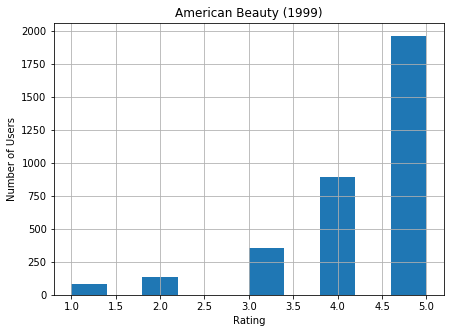

In [13]:
# User rating for movie 'American Beauty (1999)'
plt.figure(figsize=(7,5))
American_beauty=u_m_r_df[u_m_r_df['Title'] == 'American Beauty (1999)']
American_beauty['Rating'].hist()
plt.title('American Beauty (1999)')
plt.xlabel('Rating')
plt.ylabel('Number of Users')
plt.show()

In [14]:
# Check for NULL against features affecting movies
u_m_r_df[['Age','Sex','Occupation','Genres','Rating']].isnull().sum()

Age           0
Sex           0
Occupation    0
Genres        0
Rating        0
dtype: int64

#### One-hot encoding for features Genres and age

In [15]:
# Convert those categorical features affecting movie rating into numerical
genre=u_m_r_df['Genres']
genre=genre.str.get_dummies().add_prefix('genre_')
sex=pd.get_dummies(u_m_r_df['Sex'], drop_first=True, prefix='sex_')


In [16]:
# Concatinate new one-hot encoded features and drop unwanted columns
u_m_r_df=pd.concat([u_m_r_df,genre,sex],axis=1)
u_m_r_df=u_m_r_df.drop(['MovieID','Title','Genres','UserID','Timestamp','Sex','zip-code'],axis=1)


In [17]:
u_m_r_df.tail()

,Rating,Age,Occupation,genre_Action,genre_Adventure,genre_Animation,genre_Children's,genre_Comedy,genre_Crime,genre_Documentary,...,genre_Film-Noir,genre_Horror,genre_Musical,genre_Mystery,genre_Romance,genre_Sci-Fi,genre_Thriller,genre_War,genre_Western,sex__M
1000204,4,25,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
1000205,2,25,4,0,0,0,0,1,0,0,...,0,1,0,0,0,0,1,0,0,1
1000206,5,25,4,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
1000207,3,25,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
1000208,5,25,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [18]:
# Now we obtain X=features and Y=target values
X=u_m_r_df.drop('Rating', axis=1)
Y=u_m_r_df['Rating']
Y

0          5
1          5
2          5
3          4
4          5
          ..
1000204    4
1000205    2
1000206    5
1000207    3
1000208    5
Name: Rating, Length: 1000209, dtype: int64

In [19]:
# Split dataset into 80% for training and 20% testing 
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=50)
x_train.shape

(800167, 21)

#### Feature selection with random forest RF

In [20]:
def select_features(x_tr,y_tr,x_te):
    fs=SelectFromModel(RandomForestClassifier(n_estimators=50))
    # learning relationships from training data
    fs.fit(x_tr,y_tr)
    # transform training data
    x_tr_fs=fs.transform(x_tr) # transform
    # transform testing data
    x_te_fs=fs.transform(x_te)
    return x_tr_fs, x_te_fs,fs


# Selecting features
x_train_fs,x_test_fs,fs=select_features(x_train,y_train,x_test)
print('True for features whose importance is greater than mean importance \n', fs.get_support())
print('\n Selected important features are: \n', x_train.columns[(fs.get_support())])

True for features whose importance is greater than mean importance 
 [ True  True False False False False False False False False False False
 False False False False False False False False False]

 Selected important features are: 
 Index(['Age', 'Occupation'], dtype='object')


  #### Evaluation of  Linear Regression model performance

In [21]:
from sklearn import metrics
lr = LinearRegression()
lr.fit(x_train, y_train)
lr_pred = lr.predict(x_test)
print('Measn square error MSE', metrics.mean_squared_error(y_test,lr_pred))
print('r2 value', metrics.r2_score(y_test, lr_pred))

Measn square error MSE 1.1969677087680495
r2 value 0.03816389443286994
